In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

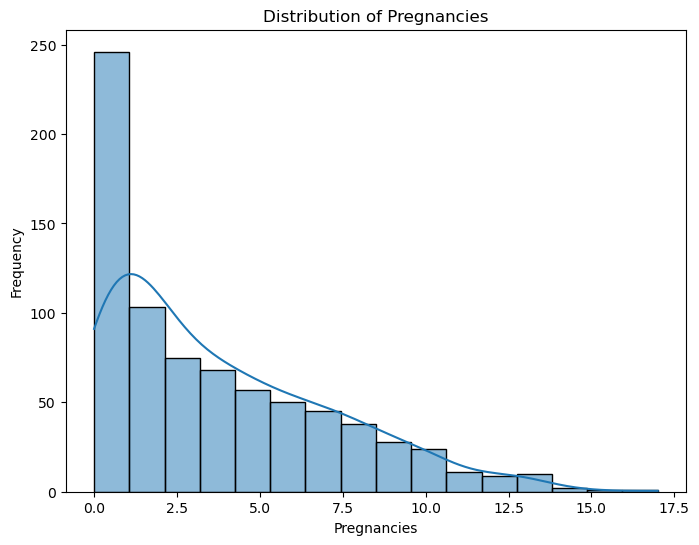

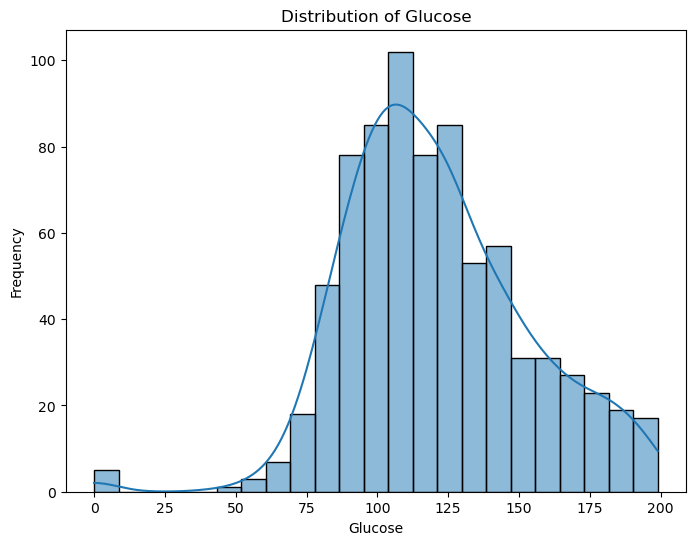

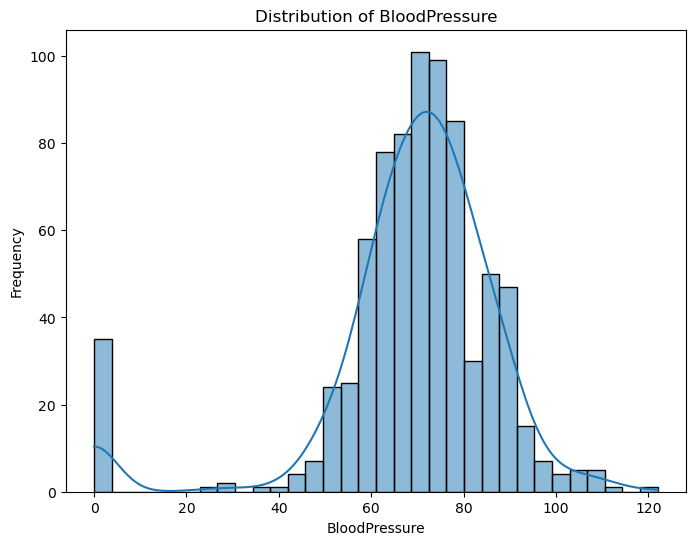

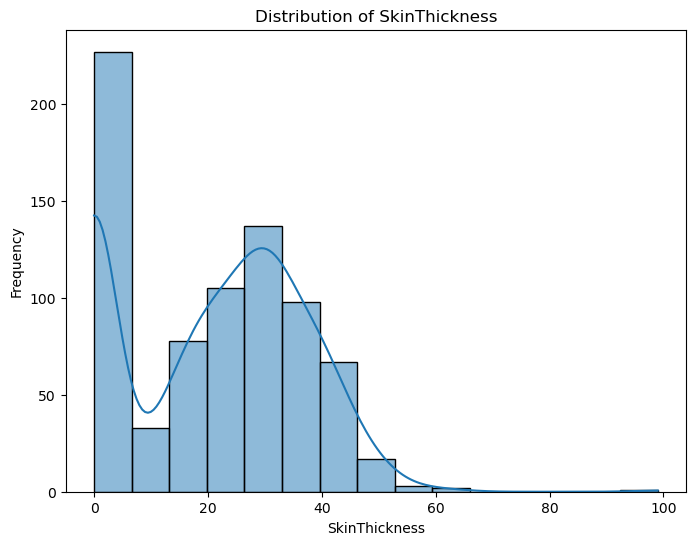

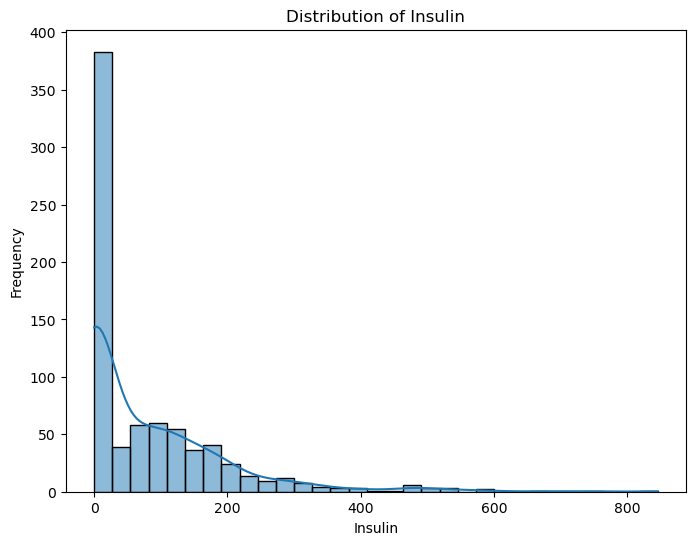

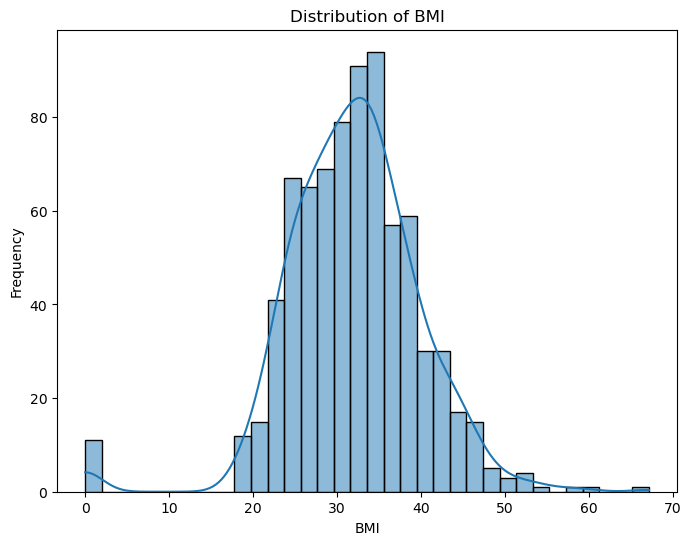

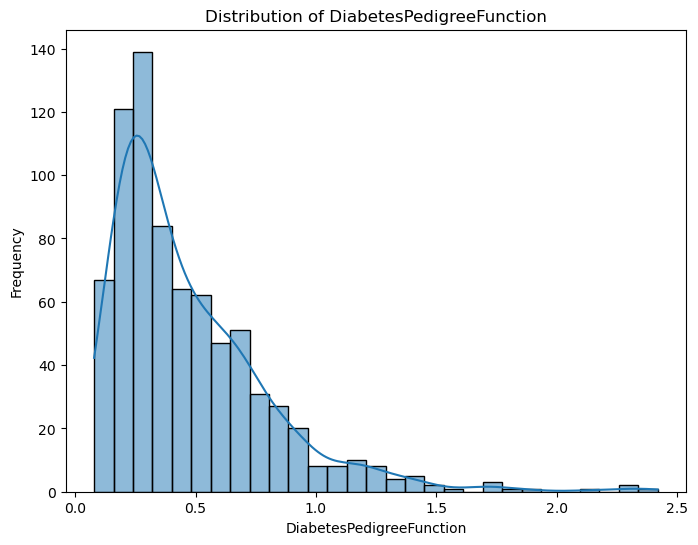

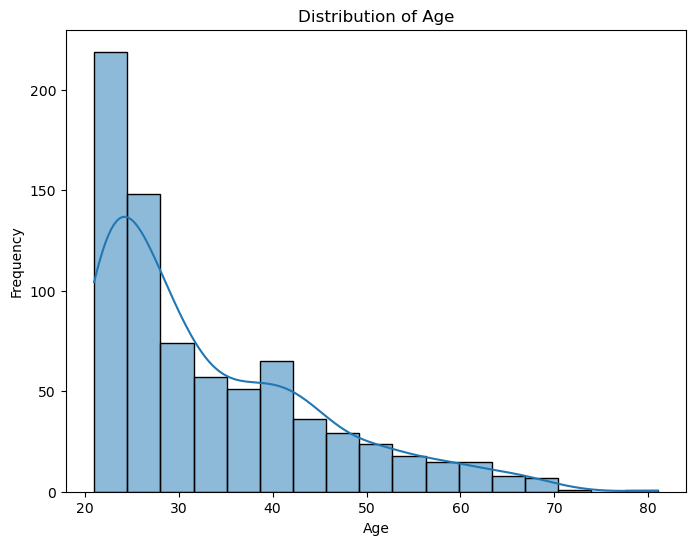

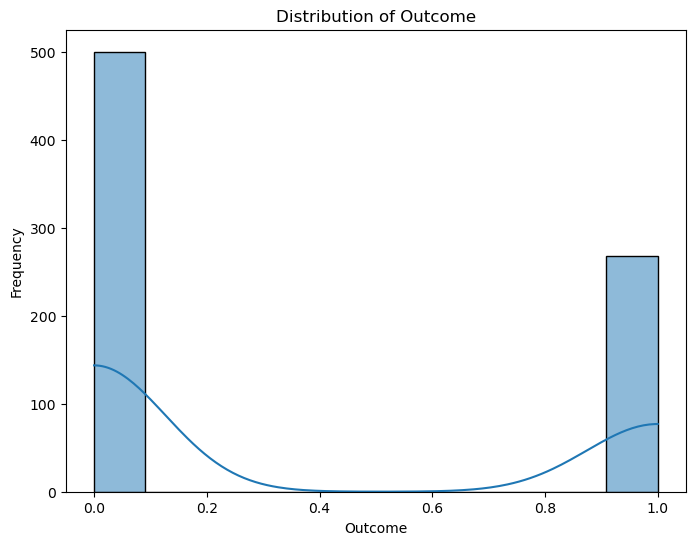

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
d1=df.select_dtypes(include=["int64","float64"])

for d2 in d1:       # Create histograms
    plt.figure(figsize=(8, 6))
    sns.histplot(d1[d2], kde=True)
    plt.title(f'Distribution of {d2}')
    plt.xlabel(d2)
    plt.ylabel('Frequency')
    plt.show()

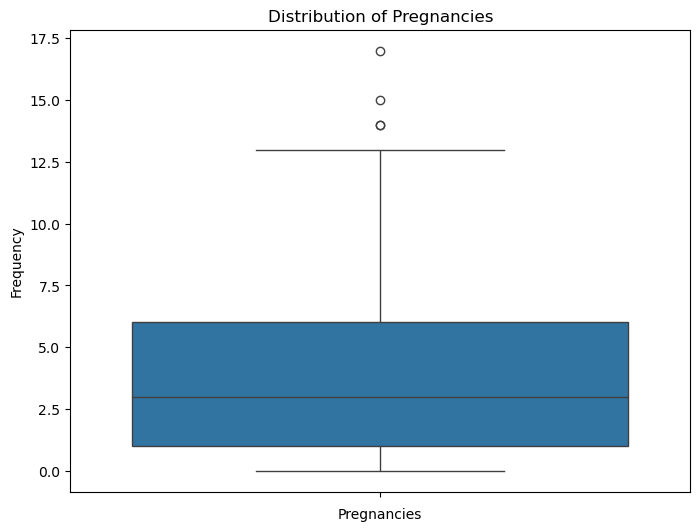

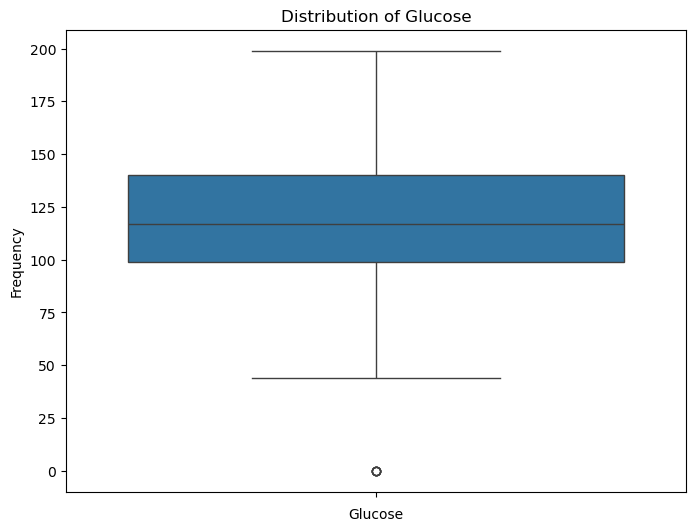

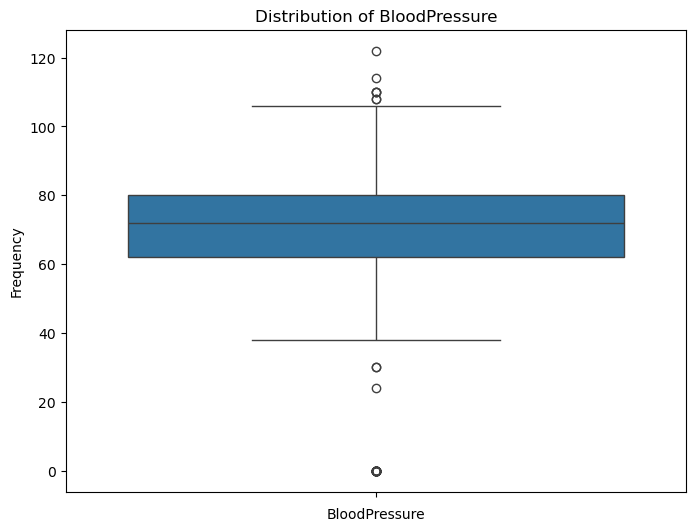

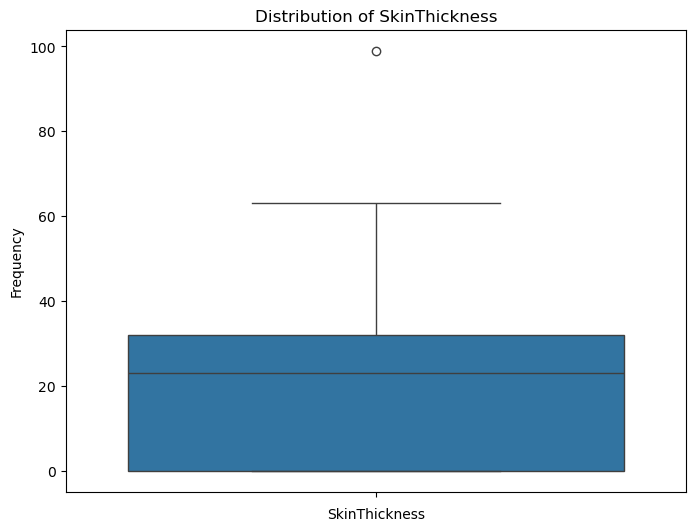

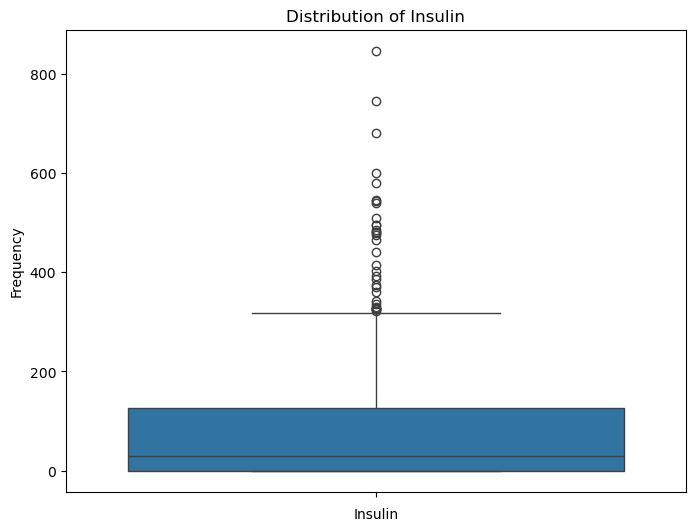

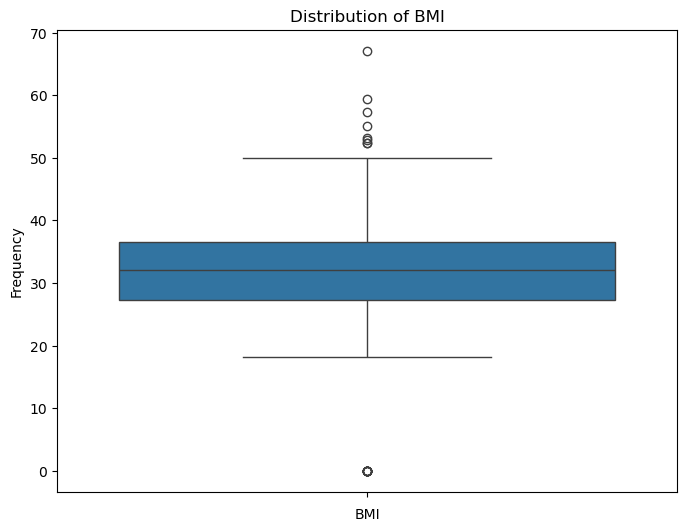

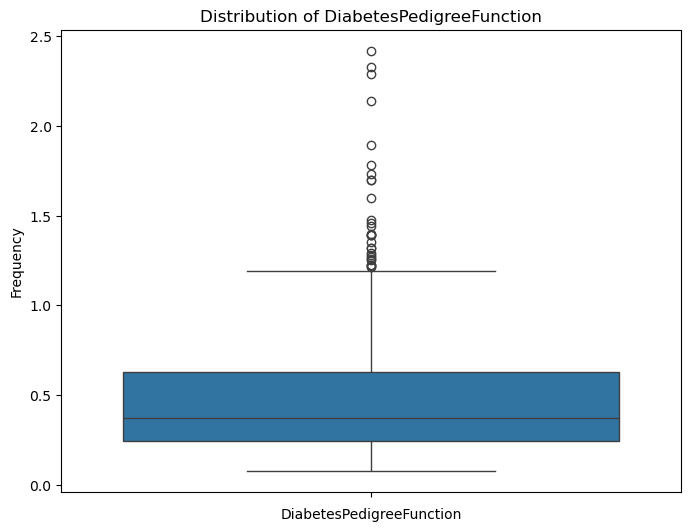

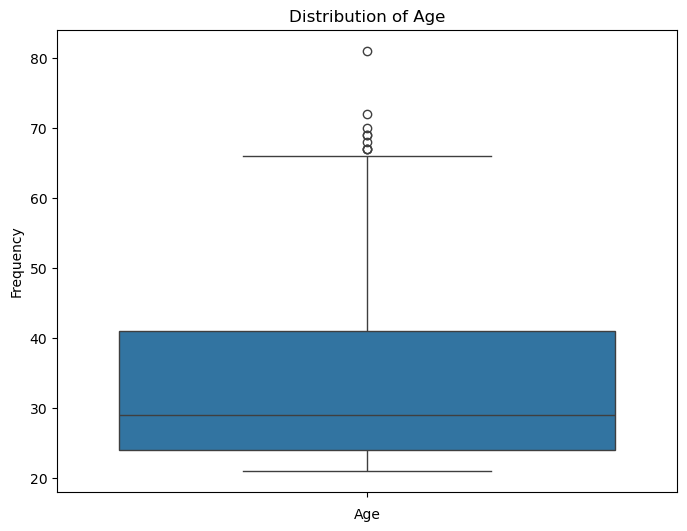

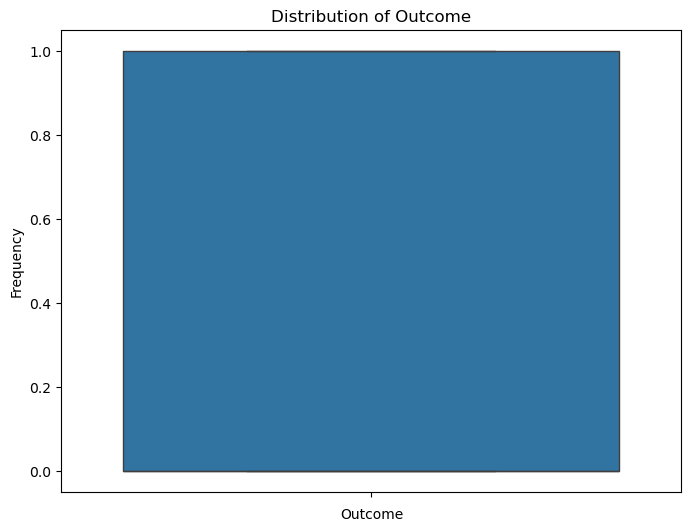

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
d1=df.select_dtypes(include=["int64","float64"])

for d2 in d1:       # Create histograms
    plt.figure(figsize=(8, 6))
    sns.boxplot(d1[d2])
    plt.title(f'Distribution of {d2}')
    plt.xlabel(d2)
    plt.ylabel('Frequency')
    plt.show()

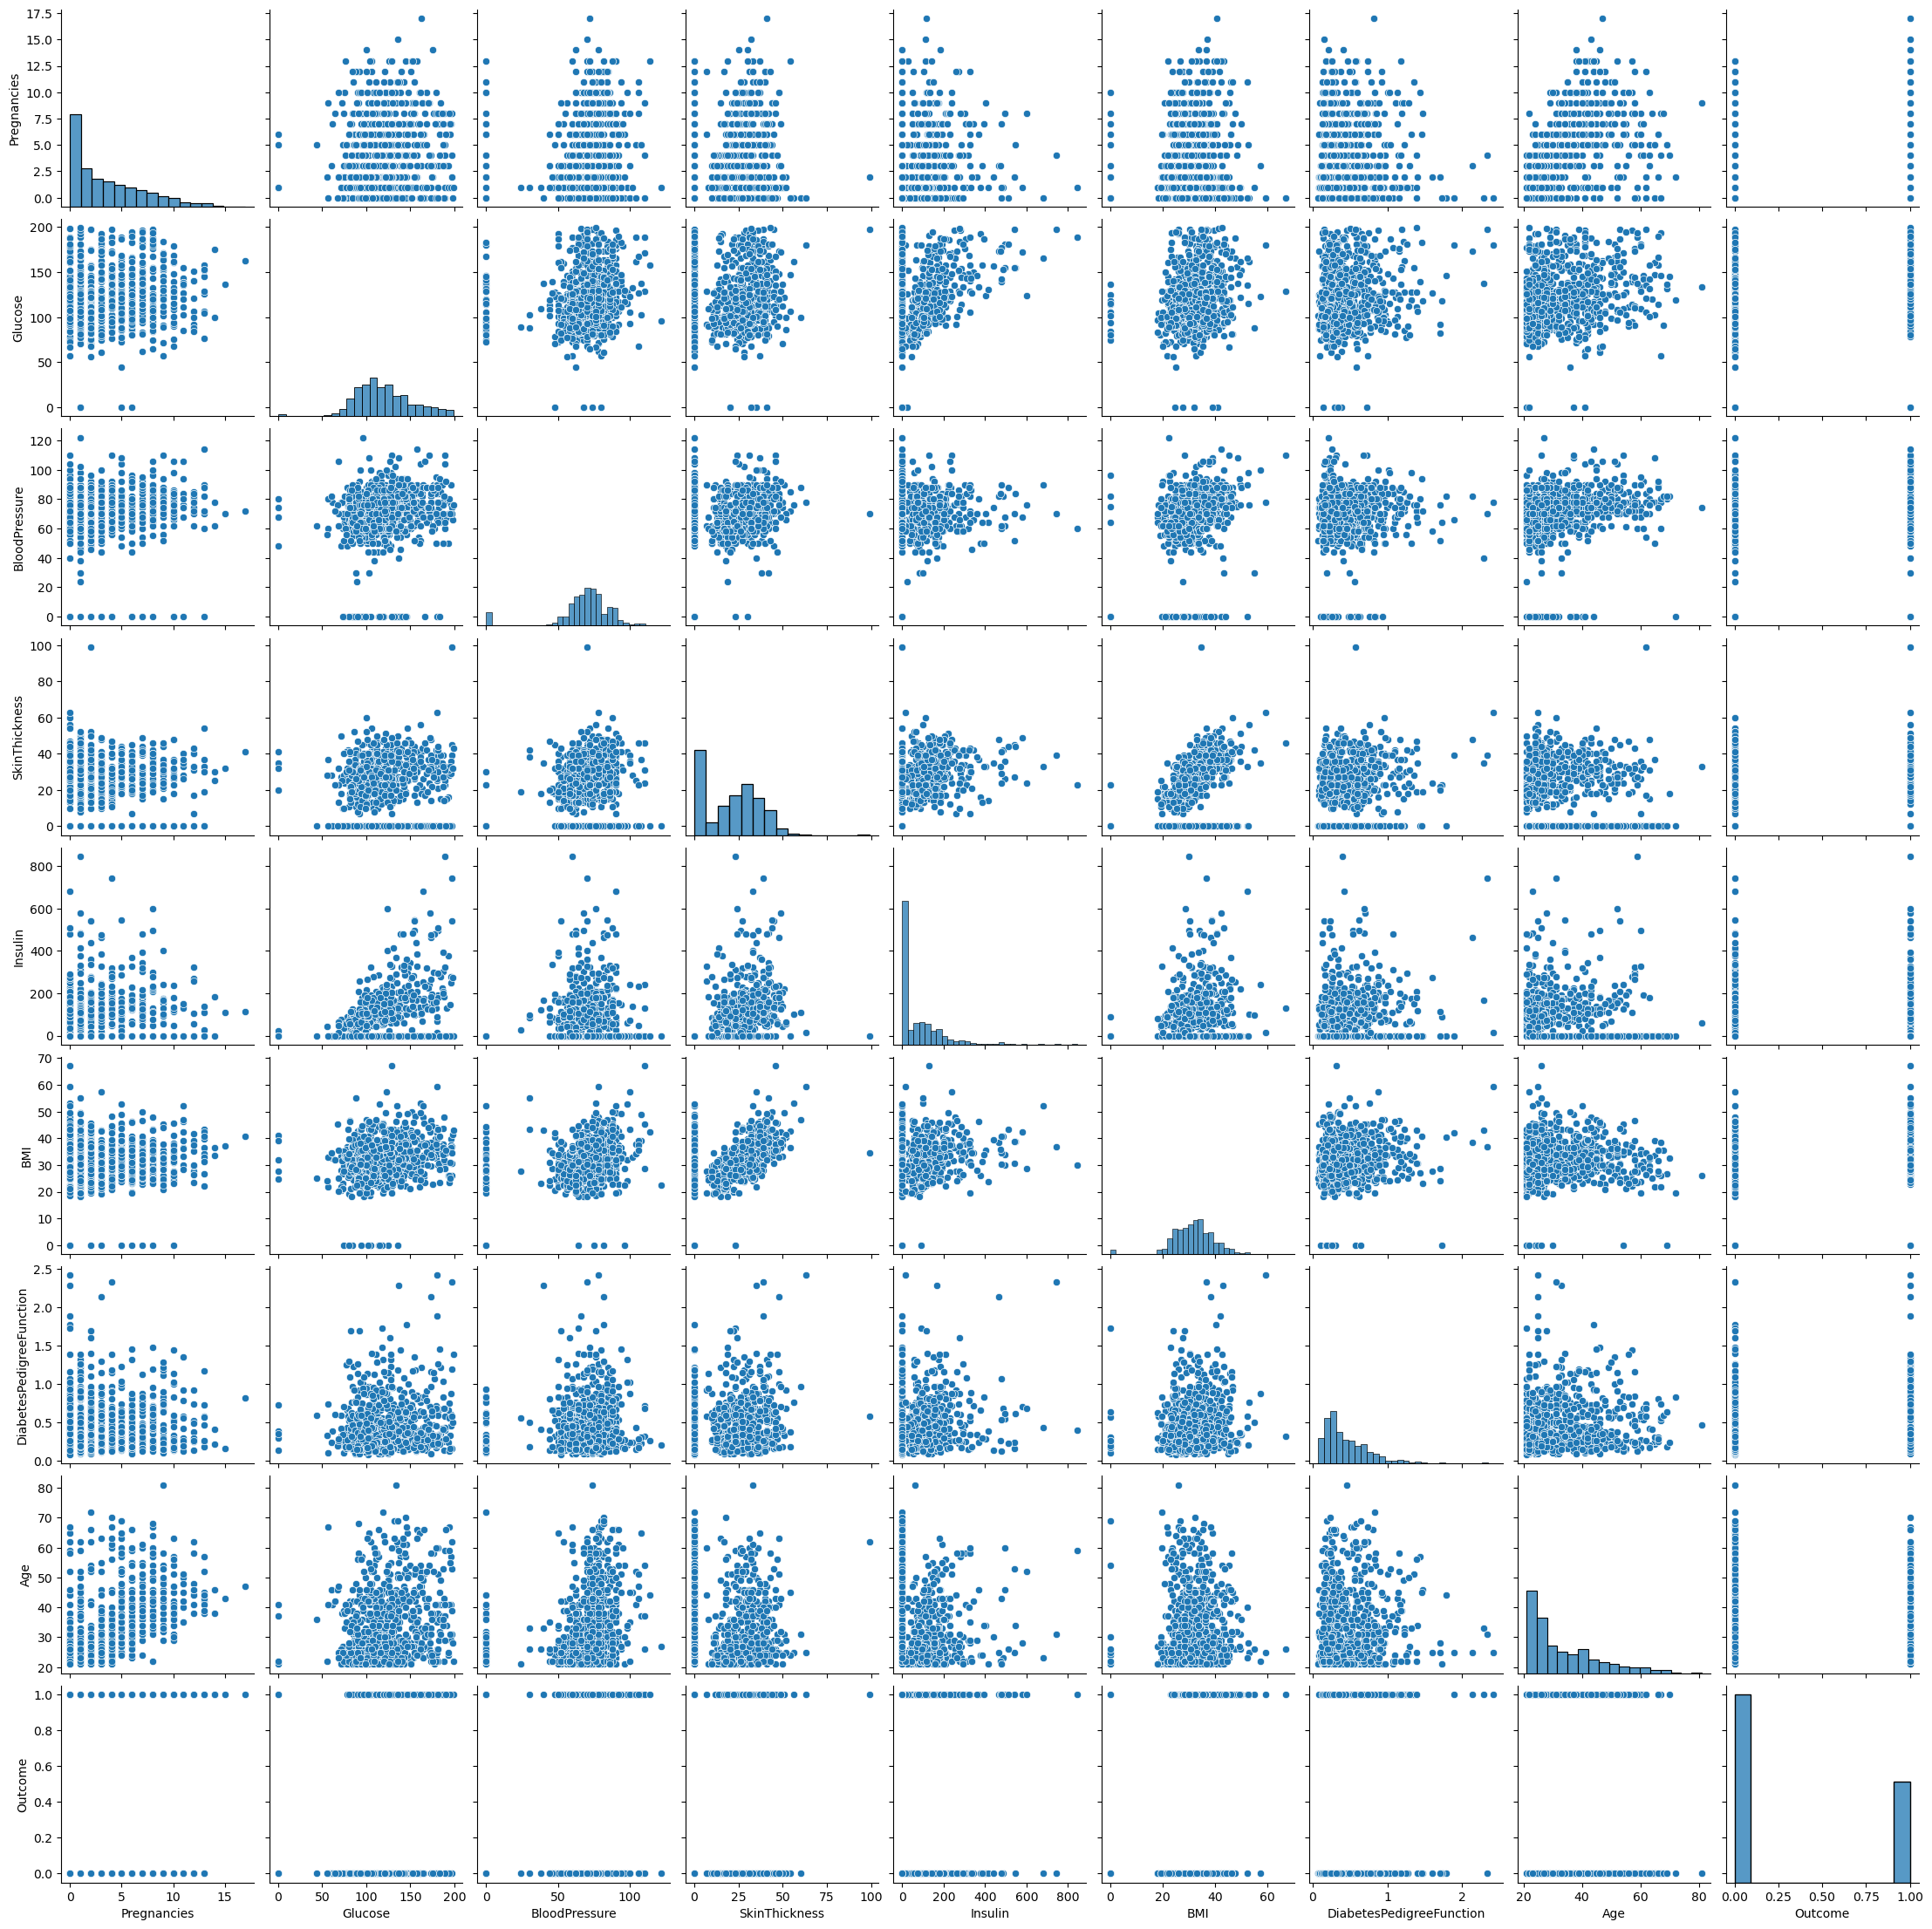

In [9]:
sns.pairplot(df)

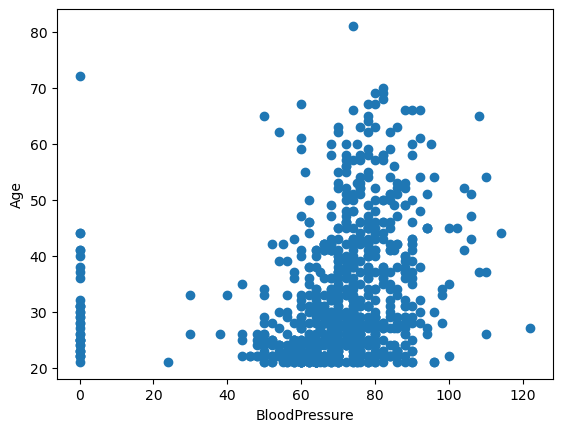

In [10]:
import matplotlib.pyplot as plt
plt.scatter(x=df["BloodPressure"],y=df["Age"])
plt.xlabel("BloodPressure")
plt.ylabel("Age")
plt.show()

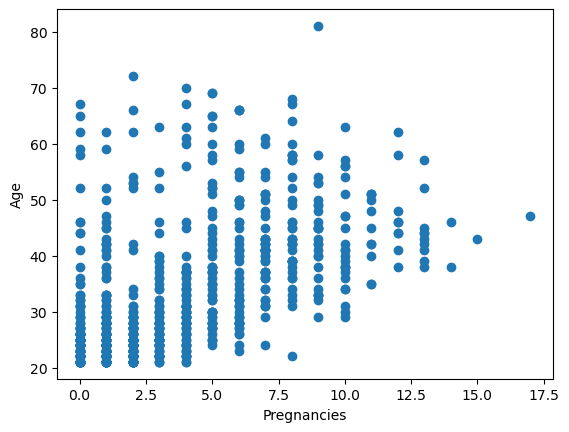

In [11]:
import matplotlib.pyplot as plt
plt.scatter(x=df["Pregnancies"],y=df["Age"])
plt.xlabel("Pregnancies")
plt.ylabel("Age")
plt.show()

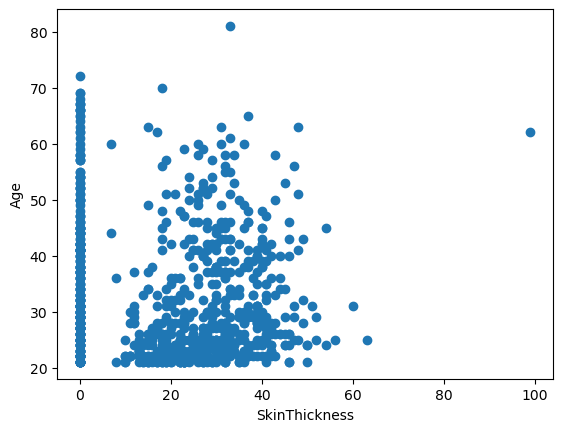

In [12]:
import matplotlib.pyplot as plt
plt.scatter(x=df["SkinThickness"],y=df["Age"])
plt.xlabel("SkinThickness")
plt.ylabel("Age")
plt.show()

#Confirm that the titanic_df (diabetes dataset) currently has no missing values, as previously identified.

# Data Preprocessing:

In [13]:
d1 = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for d2 in d1:
    df[d2] = df[d2].replace(0, np.nan)

for d2 in d1:
    median_val = df[d2].median()
    df[d2] = df[d2].fillna(median_val)

print("Zero value NaN and then imputed with the column's")

Zero value NaN and then imputed with the column's


In [14]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print("Features (X) and target (y) have been separated.")

Features (X) and target (y) have been separated.


In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("Numerical feature StandardScaler.")
print(" (X_scaled):")
print(X_scaled.head())

Numerical feature StandardScaler.
 (X_scaled):
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.866045      -0.031990       0.670643 -0.181541  0.166619   
1    -0.844885 -1.205066      -0.528319      -0.012301 -0.181541 -0.852200   
2     1.233880  2.016662      -0.693761      -0.012301 -0.181541 -1.332500   
3    -0.844885 -1.073567      -0.528319      -0.695245 -0.540642 -0.633881   
4    -1.141852  0.504422      -2.679076       0.670643  0.316566  1.549303   

   DiabetesPedigreeFunction       Age  
0                  0.468492  1.425995  
1                 -0.365061 -0.190672  
2                  0.604397 -0.105584  
3                 -0.920763 -1.041549  
4                  5.484909 -0.020496  


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

((614, 8), (154, 8), (614,), (154,))

In [17]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(random_state=42)
evaluation_metrics = ['accuracy', 'precision', 'recall']
print("LightGBM model initialized and evaluation metrics defined.")

LightGBM model initialized and evaluation metrics defined.


In [18]:
lgbm_model.fit(X_train, y_train)
print("LightGBM model trained successfully.")

[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000584 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

C:\Users\yaram\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\yaram\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\yaram\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\yaram\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [19]:
y_pred_lgbm = lgbm_model.predict(X_test)
print("LightGBM predictions on the test set have been generated.")

LightGBM predictions on the test set have been generated.


In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred_lgbm)
precision = precision_score(y_test, y_pred_lgbm)
recall = recall_score(y_test, y_pred_lgbm)
(y_test, lgbm_model.predict_proba(X_test)[:, 1])

print(f"LightGBM Model Performance:\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}")

LightGBM Model Performance:
Accuracy: 0.7532
Precision: 0.6349
Recall: 0.7273


In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [20, 31, 40]
}

grid_search_lgbm = GridSearchCV(estimator=lgbm_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search_lgbm.fit(X_train, y_train)

best_lgbm_model = grid_search_lgbm.best_estimator_

print(f"Best parameters for LightGBM: {grid_search_lgbm.best_params_}")
print(f"Best ROC AUC score for LightGBM: {grid_search_lgbm.best_score_:.4f}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000613 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
Best parameters for LightGBM: {'learning_rate': 0.01, 'n_estimators': 100, 'num_leaves': 20}
Best ROC AUC score for LightGBM: 0.8452


In [ ]:
y_pred_lgbm_tuned = best_lgbm_model.predict(X_test)
y_proba_lgbm_tuned = best_lgbm_model.predict_proba(X_test)[:, 1]

accuracy_tuned = accuracy_score(y_test, y_pred_lgbm_tuned)
precision_tuned = precision_score(y_test, y_pred_lgbm_tuned)
recall_tuned = recall_score(y_test, y_pred_lgbm_tuned)

print("Tuned LightGBM Model Performance on Test Set:")
print(f"Accuracy: {accuracy_tuned:.4f}")
print(f"Precision: {precision_tuned:.4f}")
print(f"Recall: {recall_tuned:.4f}")

In [22]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

print("XGBoost model initialized.")

XGBoost model initialized.


In [23]:
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost model trained successfully.")
print("XGBoost predictions on the test set have been generated.")

C:\Users\yaram\anaconda3\Lib\site-packages\xgboost\training.py:200: UserWarning: [13:59:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost model trained successfully.
XGBoost predictions on the test set have been generated.


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)


print(f"XGBoost Model Performance:\nAccuracy: {accuracy_xgb:.4f}\nPrecision: {precision_xgb:.4f}\nRecall: {recall_xgb:.4f}")

XGBoost Model Performance:
Accuracy: 0.7143
Precision: 0.5873
Recall: 0.6727


In [38]:
from sklearn.model_selection import GridSearchCV

param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_search_xgb.fit(X_train, y_train)

best_xgb_model = grid_search_xgb.best_estimator_

print(f"Best parameters for XGBoost: {grid_search_xgb.best_params_}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits


C:\Users\yaram\anaconda3\Lib\site-packages\xgboost\training.py:200: UserWarning: [14:05:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}


In [39]:
y_pred_xgb_tuned = best_xgb_model.predict(X_test)
y_proba_xgb_tuned = best_xgb_model.predict_proba(X_test)[:, 1]

accuracy_xgb_tuned = accuracy_score(y_test, y_pred_xgb_tuned)
precision_xgb_tuned = precision_score(y_test, y_pred_xgb_tuned)
recall_xgb_tuned = recall_score(y_test, y_pred_xgb_tuned)

print("Tuned XGBoost Model Performance on Test Set:")
print(f"Accuracy: {accuracy_xgb_tuned:.4f}")
print(f"Precision: {precision_xgb_tuned:.4f}")
print(f"Recall: {recall_xgb_tuned:.4f}")


Tuned XGBoost Model Performance on Test Set:
Accuracy: 0.7532
Precision: 0.6604
Recall: 0.6364


In [74]:
metrics = {
    'Model': ['LightGBM', 'XGBoost'],
    'Accuracy': [accuracy_tuned, accuracy_xgb_tuned],
    'Precision': [precision_tuned, precision_xgb_tuned],
    'Recall': [recall_tuned, recall_xgb_tuned],
    
}

performance_df = pd.DataFrame(metrics_data)
print("Comparison of Performance model metrices: LighjtGBM vs XGBoost")
print(performance_df.round(4))

Comparison of Performance model metrices: LighjtGBM vs XGBoost
              Model  Accuracy  Precision  Recall
0  LightGBM (Tuned)    0.8052     0.7551  0.6727
1   XGBoost (Tuned)    0.7532     0.6604  0.6364


In [76]:
metrics_df=pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,Precision,Recall
0,LightGBM,0.805195,0.755102,0.672727
1,XGBoost,0.753247,0.660377,0.636364


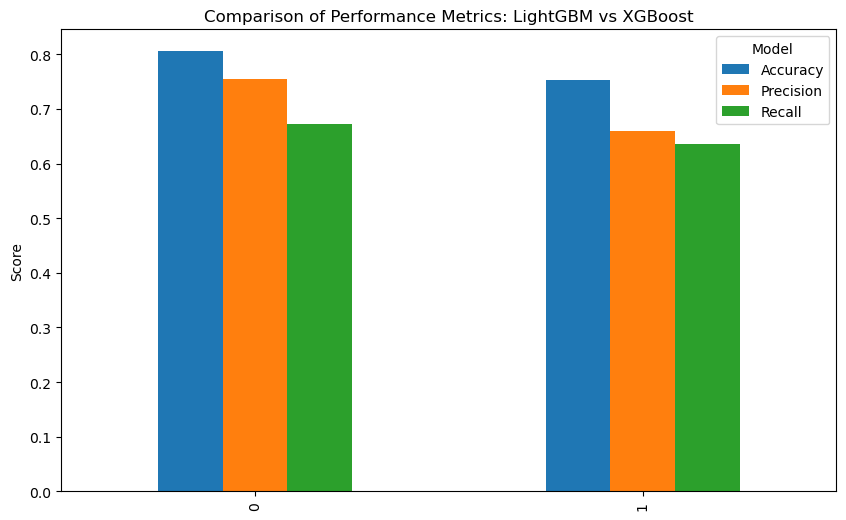

In [78]:

#Visualizations between LightGBM and XGBoost
metrics_df.plot( kind='bar', figsize=(10, 6))
plt.title("Comparison of Performance Metrics: LightGBM vs XGBoost")
plt.ylabel("Score")
plt.legend(title="Model")
plt.show()